# Equação do Calor 1D — Solução Numérica com Runge-Kutta

## 📘 Definição

A **equação do calor unidimensional** descreve como a temperatura varia ao longo do tempo em uma barra:


$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$


onde:

- \( u(x, t) \): temperatura na posição \( x \) e tempo \( t \),
- \( \alpha > 0 \): coeficiente de difusão térmica.

---

##  Condições do problema

- **Domínio espacial:** \( x \in [0, L] \)
- **Tempo:** \( t \geq 0 \)
- **Condição inicial (CI):**

\[
u(x, 0) = f(x)
\]

- **Condições de contorno (CC):**

\[
u(0, t) = u(L, t) = 0 \quad \text{(Dirichlet homogêneas)}
\]

---

## Discretização espacial

Utilizando o método das diferenças finitas centradas:

- Discretizamos o espaço com \( N \) pontos,
- Espaçamento: \( \Delta x = \frac{L}{N - 1} \),
- A segunda derivada é aproximada por:

\[
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{(\Delta x)^2}
\]

Assim, obtemos um **sistema de equações diferenciais ordinárias (EDOs)** para cada ponto interno \( i \):

\[
\frac{du_i}{dt} = \alpha \cdot \frac{u_{i+1} - 2u_i + u_{i-1}}{(\Delta x)^2}
\]

---

##  Integração no tempo: Runge-Kutta de 4ª ordem (RK4)

Para resolver o sistema de EDOs em \( t \), aplicamos o método RK4:

\[
\begin{aligned}
k_1 &= f(u^n) \\
k_2 &= f\left(u^n + \frac{\Delta t}{2} k_1\right) \\
k_3 &= f\left(u^n + \frac{\Delta t}{2} k_2\right) \\
k_4 &= f\left(u^n + \Delta t \cdot k_3\right) \\
u^{n+1} &= u^n + \frac{\Delta t}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right)
\end{aligned}
\]

---

## Visualização dos resultados

A solução é representada como uma matriz \( u(x, t) \), e pode ser visualizada como:

- Gráficos de temperatura ao longo do espaço para diferentes tempos,
- Mapa de calor 2D com temperatura codificada por cores (eixo \( x \) vs. tempo \( t \)).

---

##  Observações

- A escolha adequada de \( \Delta x \) e \( \Delta t \) é essencial para garantir **estabilidade e precisão**.
- Para simulações mais extensas ou rígidas, métodos **implícitos** (ex: Crank-Nicolson) são mais indicados.
- O método RK4 é preciso, mas **explícito** — ou seja, sujeito a restrições no passo de tempo.

---

## 🧪 Método 


- **Método numérico:** Runge-Kutta de 4ª ordem (RK4)


In [5]:
# ====================================================
# Simulação da Equação do Calor 1D usando Runge-Kutta (RK4)
# ====================================================

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# --------------------------
# Parâmetros físicos e numéricos
# --------------------------
alpha = 1.0     # coeficiente de difusão térmica
L = 1.0         # comprimento da barra
Nx = 20         # número de pontos no espaço
dx = L / (Nx - 1)  # passo espacial
x = np.linspace(0, L, Nx)  # vetor de posições

T = 0.1         # tempo total da simulação
dt = 0.001      # passo de tempo
Nt = int(T / dt)  # número de passos no tempo

In [7]:
# --------------------------
# Condição inicial: pulso de calor no centro da barra
# --------------------------
u0 = np.exp(-100 * (x - 0.5)**2)

In [8]:
# --------------------------
# Função para aplicar condições de contorno de Dirichlet (u = 0 nas extremidades)
# --------------------------
def apply_boundary(u):
    u[0] = 0
    u[-1] = 0
    return u

In [9]:
# --------------------------
# Discretização da equação do calor (sistema de EDOs)
# --------------------------
def dudt(u):
    du = np.zeros_like(u)
    for i in range(1, Nx - 1):
        du[i] = alpha * (u[i+1] - 2*u[i] + u[i-1]) / dx**2
    return du





In [10]:
# --------------------------
# Passo do método de Runge-Kutta de 4ª ordem (RK4)
# --------------------------
def rk4_step(u, dt):
    k1 = dudt(u)
    k2 = dudt(u + 0.5 * dt * k1)
    k3 = dudt(u + 0.5 * dt * k2)
    k4 = dudt(u + dt * k3)
    return u + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)



In [11]:
# --------------------------
# Loop de simulação
# --------------------------
u = u0.copy()
sol = [u0.copy()]  # armazena a solução para visualização

for _ in range(Nt):
    u = rk4_step(u, dt)     # aplica RK4
    u = apply_boundary(u)   # aplica condição de contorno
    sol.append(u.copy())    # salva estado atual

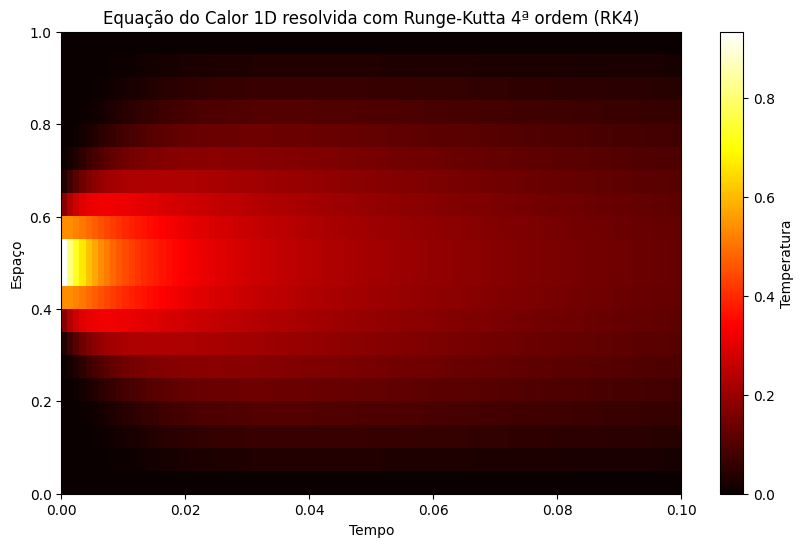

In [12]:
# --------------------------
# Visualização: mapa de calor (temperatura vs espaço e tempo)
# --------------------------
sol = np.array(sol)

plt.figure(figsize=(10, 6))
plt.imshow(sol.T, extent=[0, T, 0, L], aspect='auto', origin='lower', cmap='hot')
plt.colorbar(label="Temperatura")
plt.xlabel("Tempo")
plt.ylabel("Espaço")
plt.title("Equação do Calor 1D resolvida com Runge-Kutta 4ª ordem (RK4)")
plt.grid(False)
plt.show()